<a href="https://colab.research.google.com/github/mglovyak/-/blob/main/Remowe_background.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

In [ ]:
from google.colab import files

# Загрузка изображения
uploaded = files.upload()

Saving unnamed.jpg to unnamed (1).jpg


In [ ]:
image = cv2.imread("/content/unnamed.jpg")

# Теперь image - это объект, в котором хранятся все пиксели картинки.
# Чтобы посмотреть на значение пикселей, ты можешь просто распечать.
# А еще можешь исследовать свойства своей картинки
height, width, channels = image.shape
print("Ширина:", width)
print("Высота:", height)
print("Количество каналов:", channels)


Ширина: 900
Высота: 900
Количество каналов: 3


In [ ]:
!pip install rembg

#Для того, чтобы библиотека работала, нужно зафиксировать версию зависимой библиотеки!
!pip install Pillow==9.0.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 50.7 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.0.0
    Uninstalling Pillow-9.0.0:
      Successfully uninstalled Pillow-9.0.0


  Using cached Pillow-9.0.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.6 kB)
Using cached Pillow-9.0.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.3 MB)
  Attempting uninstall: Pillow
    Found existing installation: pillow 10.4.0
    Uninstalling pillow-10.4.0:
      Successfully uninstalled pillow-10.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.23.2 requires pillow>=9.1, but you have pillow 9.0.0 which is incompatible.


In [ ]:
from rembg import remove

input_path = '/content/unnamed.jpg'
output_path = 'output.png'

with open(input_path, 'rb') as i:
    with open(output_path, 'wb') as o:
        input = i.read()
        output = remove(input)
        o.write(output)

In [ ]:
import numpy as np

def change_back(background, img):
    """ Функция для замены черного фона изображения на другую картинку.
    На вход принимается фон background и само изображение img.
    Далее начиная с верхнего левого угла изображения все черные пиксели (их значение = 0)
    будут заменены на пиксели из картинки с фоном"""

    x, y = 0, 0
    background = cv2.resize(background, (img.shape[1], img.shape[0]), interpolation = cv2.INTER_AREA)
    res = np.copy(background)
    place = res[y: y + img.shape[0], x: x + img.shape[1]]
    a = img[..., 3:].repeat(3, axis=2).astype('uint16')
    place[...] = (place.astype('uint16') * (255 - a) // 255) + img[..., :3].astype('uint16') * a // 255
    return res

In [ ]:
image = cv2.imread('output.png', cv2.IMREAD_UNCHANGED)
back = cv2.imread('/content/galaxy-wallpaper-in-warm-colors.jpg')
result = change_back(back, image)

cv2.imwrite("result.png", result)

True

In [ ]:
import cv2


image = cv2.imread('/content/имя_файла.jpg')


In [ ]:

# Это текст
text = "Местный режисёр"
# Это шрифт
font = cv2.FONT_HERSHEY_SIMPLEX
# Это размер шрифта
font_scale = 14
# А это цвет в формате BGR (синий, зеленый, красный).
# Тут - белый
color = (255, 0, 255)
# Это толщина линии
thickness = 2
# Наша переменная,для показа изображения

image_with_text = cv2.putText( 'имя_файла.img', text, (10, 10), font, font_scale, color, thickness, cv2.LINE_AA)

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'putText'
> Overload resolution failed:
>  - img is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'img'


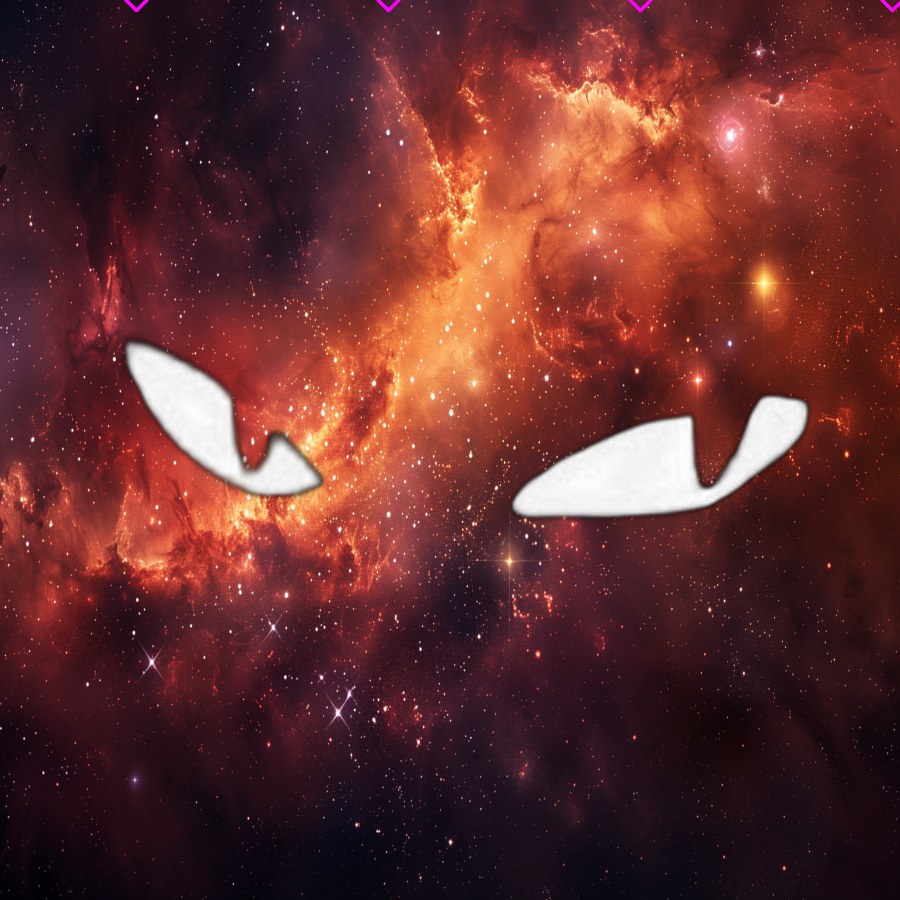

True

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(image_with_text)
cv2.imwrite('/content/имя_файла.jpg', image_with_text)